In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Using the Pokemon dataset to explore dataviz
This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from http://serebii.net/

#### Download the data from the following location: https://www.kaggle.com/rounakbanik/pokemon

In [11]:
pokedata = pd.read_csv('E:\Lighthouse Data\W3D1\pokemon.csv')

In [25]:
pokedata.columns

Index(['ABILITIES', 'AGAINST_BUG', 'AGAINST_DARK', 'AGAINST_DRAGON',
       'AGAINST_ELECTRIC', 'AGAINST_FAIRY', 'AGAINST_FIGHT', 'AGAINST_FIRE',
       'AGAINST_FLYING', 'AGAINST_GHOST', 'AGAINST_GRASS', 'AGAINST_GROUND',
       'AGAINST_ICE', 'AGAINST_NORMAL', 'AGAINST_POISON', 'AGAINST_PSYCHIC',
       'AGAINST_ROCK', 'AGAINST_STEEL', 'AGAINST_WATER', 'ATTACK',
       'BASE_EGG_STEPS', 'BASE_HAPPINESS', 'BASE_TOTAL', 'CAPTURE_RATE',
       'CLASSFICATION', 'DEFENSE', 'EXPERIENCE_GROWTH', 'HEIGHT_M', 'HP',
       'JAPANESE_NAME', 'NAME', 'PERCENTAGE_MALE', 'POKEDEX_NUMBER',
       'SP_ATTACK', 'SP_DEFENSE', 'SPEED', 'TYPE1', 'TYPE2', 'WEIGHT_KG',
       'GENERATION', 'IS_LEGENDARY', 'TYPE 1', 'TYPE 2'],
      dtype='object')

### Cleaning data

In [26]:
pokedata.columns = pokedata.columns.str.upper()
pokedata['TYPE 1'] = pokedata['TYPE1'].str.capitalize()
pokedata['TYPE 2'] = pokedata['TYPE2'].str.capitalize()
pokedata.drop_duplicates(keep='first', inplace=True)

### 1. barplot using <code>Seaborn</code>

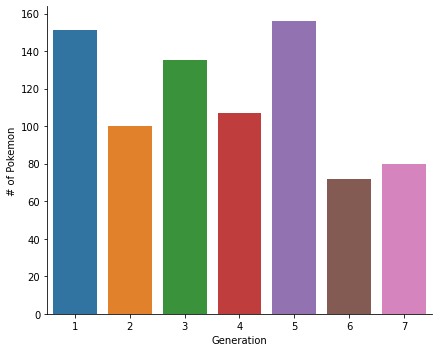

In [36]:
sns.factorplot(
    x='GENERATION', 
    data=pokedata,
    size=5,
    aspect=1.2,
    kind='count'
).set_axis_labels('Generation', '# of Pokemon')

plt.show()

### 2. Pie Chart using <code>matplotlib</code>

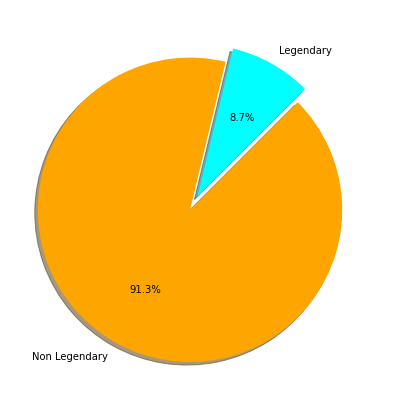

In [37]:
fig = plt.figure(figsize=(7,7))

colours = ["aqua", "orange"]
pokeLeg = pokedata[pokedata['IS_LEGENDARY']==True]
pokeNon = pokedata[pokedata['IS_LEGENDARY']==False]

legDist = [pokeLeg['NAME'].count(),pokeNon['NAME'].count()]
legPie = plt.pie(legDist,
                 labels= ['Legendary', 'Non Legendary'], 
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors=colours,
                 startangle = 45,
                 explode=(0, 0.1))

### 3. Multiple Pie-Charts in same <code>fig</code> using <code>matplotlib</code>

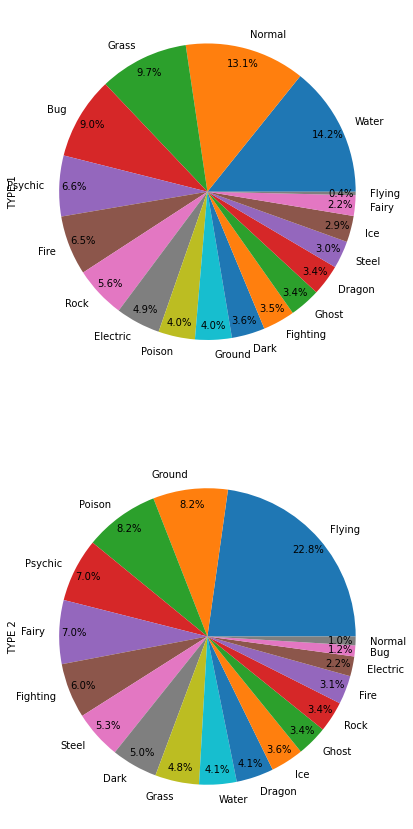

In [38]:
fig = plt.figure(figsize=(15,15))

fig.add_subplot(211)
pokedata['TYPE 1'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=0.9)

fig.add_subplot(212)
pokedata['TYPE 2'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=0.9)

plt.show()

#### 4. Multiple Bar-Charts in same <code>factorplot</code> using <code>seaborn</code>

C:\Users\Arunabh\miniconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Arunabh\miniconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


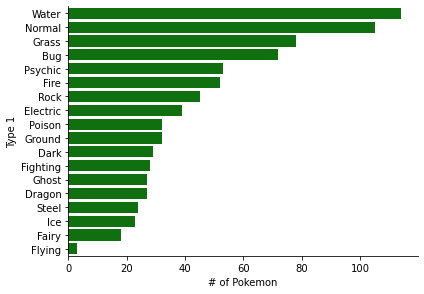

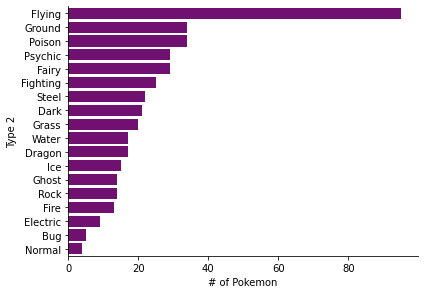

In [40]:
sns.factorplot(
    y='TYPE 1',
    data=pokedata,
    kind='count',
    order=pokedata['TYPE 1'].value_counts().index,
    size=4,
    aspect=1.5,
    color='green'
).set_axis_labels('# of Pokemon', 'Type 1')

sns.factorplot(
    y='TYPE 2',
    data=pokedata,
    kind='count',
    order=pokedata['TYPE 2'].value_counts().index,
    size=4,
    aspect=1.5,
    color='purple'
).set_axis_labels('# of Pokemon', 'Type 2');